In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop("Id", axis = 1, inplace = True)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [8]:
iris.shape

(150, 5)

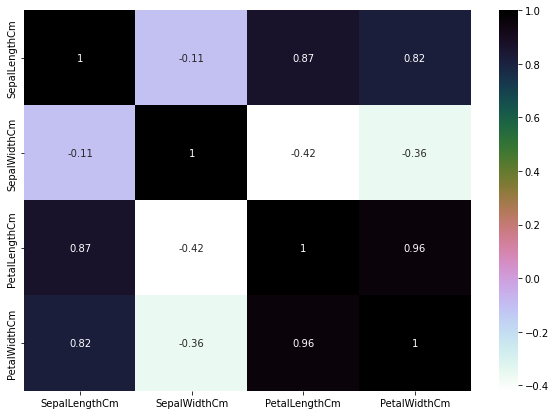

In [9]:
plt.figure(figsize= (10,7))
sns.heatmap(iris.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

In [19]:
train, test = train_test_split(iris, test_size = 0.3,random_state=42)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [20]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ]]
train_y = train.Species

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm' ]]
test_y = test.Species

In [21]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


**SVC**

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(SVC(), train_X, train_y, cv=cv)

array([0.95238095, 0.95238095, 0.95238095, 1.        , 0.95238095])

In [31]:
model = SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of SVM is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of SVM is:  1.0


**Logistic Regression**

In [27]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LogisticRegression(), train_X, train_y, cv=cv)

array([1.        , 0.95238095, 0.95238095, 0.95238095, 0.95238095])

In [32]:
model1  = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print("The Accuracy of LR is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of LR is:  1.0


**Decision Tree**

In [28]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(DecisionTreeClassifier(), train_X, train_y, cv=cv)

array([1.        , 0.9047619 , 0.95238095, 0.95238095, 1.        ])

In [33]:
model2 = DecisionTreeClassifier()
model2.fit(train_X, train_y)
prediction = model2.predict(test_X)
print("The Accuracy of DT is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of DT is:  1.0


**KNN**

In [29]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(KNeighborsClassifier(), train_X, train_y, cv=cv)

array([1.       , 0.9047619, 0.9047619, 1.       , 1.       ])

In [34]:
model3 = KNeighborsClassifier(n_neighbors = 3)
model3.fit(train_X, train_y)
prediction = model3.predict(test_X)
print("The Accuracy of KNN is: ",metrics.accuracy_score(prediction, test_y))

The Accuracy of KNN is:  1.0
